# ANÁLISIS Z2
nivel de prioridad: $\color{yellow}{Medio}$

Vamos a ver que le pasa a la señl cuando vamos girando la antena y le aumentamos el anguro con respecto a la vertical

In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from matplotlib import pyplot as plt

import os

In [2]:
%run check_import.ipynb
%run FFT_ordenada.ipynb
%run to_baseband.ipynb
%run to_dB.ipynb

In [3]:
## Parámetros de la medición

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8'
#=====================
if portadora== 'Fc7':
    fc = 7.290e9 # frecuencia portadora
    Fc = '7.29GHz'
elif portadora== 'Fc8':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')
#======================


#CHEQUEAR EN QUE ALTURA SE MIDE
altura = '1/'
D, h = '35.3cm', 0.353

tita= [10, 20, 30, 40]

In [4]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'
target1 = 'S1'
target2 = 'S2'

if sistema == 'ubuntu':
    ##----Ubuntu----##
    #código para gordotony#
    #path = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/'
    path = '/home/gordotony/Documents/GitHub/tesis/mediciones_15_07/'
    
    
    #COMPLETAR
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_15_07'
    #path = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06'

    Scal = check_import_win(path,portadora,altura,target1)
    print('Scal =', np.shape(Scal))
    print()
    

    Star = check_import_win(path,portadora,altura,target2)
    print('Star =',np.shape(Star))
    print()
    

    Z2 = Z2_check_import_win(path,portadora,altura)
    print('Z2 =', np.shape(Z2))
    print()

    
    
else:
    print('elegir sistema operativo')


# mediciones = 5

medición  S1  #0 = 441
medición  S1  #1 = 441
medición  S1  #2 = 441
medición  S1  #3 = 441
medición  S1  #4 = 441

iguales, importo datos!!
Scal = (5, 440, 11)

# mediciones = 6

medición  S2  #0 = 441
medición  S2  #1 = 441
medición  S2  #2 = 441
medición  S2  #3 = 441
medición  S2  #4 = 441
medición  S2  #5 = 441

iguales, importo datos!!
Star = (6, 440, 11)


# de angulos = 4
# de repeticiones = 3
longitud medición #1 = 441
longitud medición #2 = 441
longitud medición #3 = 441

# de repeticiones = 3
longitud medición #1 = 441
longitud medición #2 = 441
longitud medición #3 = 441

# de repeticiones = 3
longitud medición #1 = 441
longitud medición #2 = 441
longitud medición #3 = 441

# de repeticiones = 3
longitud medición #1 = 441
longitud medición #2 = 441
longitud medición #3 = 441


iguales, importo datos!!
Z2 = (440, 11, 4, 3)



In [5]:
dist = Scal[0,:,0]
S1_avg  = np.mean(Scal[0:,:,1:],axis=(0,2))
S2_avg  = np.mean(Star[0:,:,1:],axis=(0,2))
Z2_avg  = np.mean(Z2[:,1:,0:],axis=(1,3))

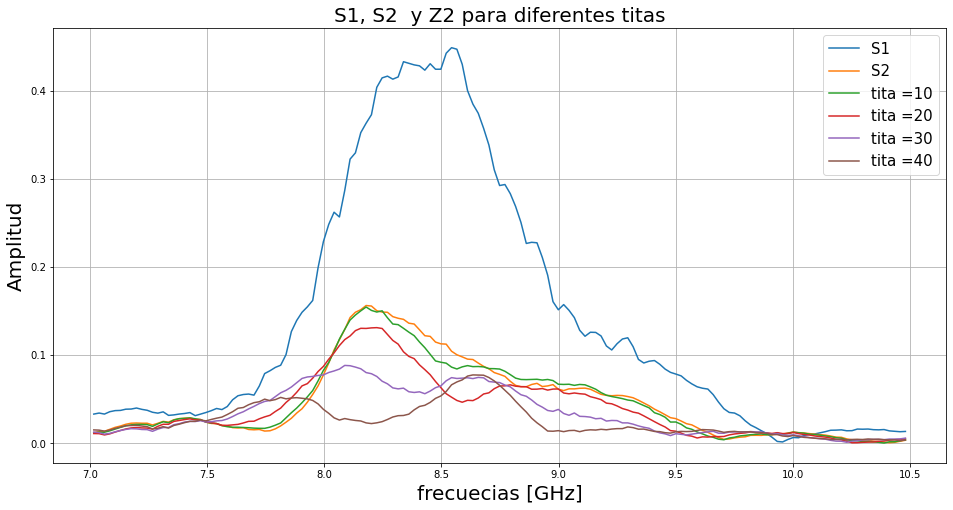

In [6]:
#Transformo fourier
Nfft= 1024

S1_fft = np.zeros(Nfft,dtype=complex)
S2_fft = np.zeros(Nfft,dtype=complex)
Z2_fft = np.zeros((Nfft,len(tita)),dtype=complex)

frec_fft, S1_fft = FFT_ordenada(S1_avg,Nfft,Ts)
S2_fft = FFT_ordenada(S2_avg,Nfft,Ts)[1]

for j1 in range(len(tita)):
    Z2_fft[:,j1] = FFT_ordenada(Z2_avg[:,j1],Nfft,Ts)[1]

#corto frecuecias
Deltaf = 1.75e9
f_min = fc-Deltaf
f_max = fc+Deltaf
#f_min, f_max = 6.5e9, 11e9

f_pos = frec_fft[(frec_fft>f_min) & (frec_fft<f_max)]
n_frecs = len(f_pos)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<f_max))+1)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz


#grafico
plt.figure(figsize=(16,8))
plt.plot(f_norm,np.abs(S1_fft[start:end]),label='S1')
plt.plot(f_norm,np.abs(S2_fft[start:end]),label='S2')

for j2 in range(len(tita)):
    plt.plot(f_norm,np.abs(Z2_fft[start:end,j2]),label='tita ='+ str(tita[j2]))

plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuecias [GHz]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1, S2  y Z2 para diferentes titas',fontsize=20)
plt.show()    

(440, 4)


Text(0.5, 1.0, 'S1, S2 y Z2 en BB')

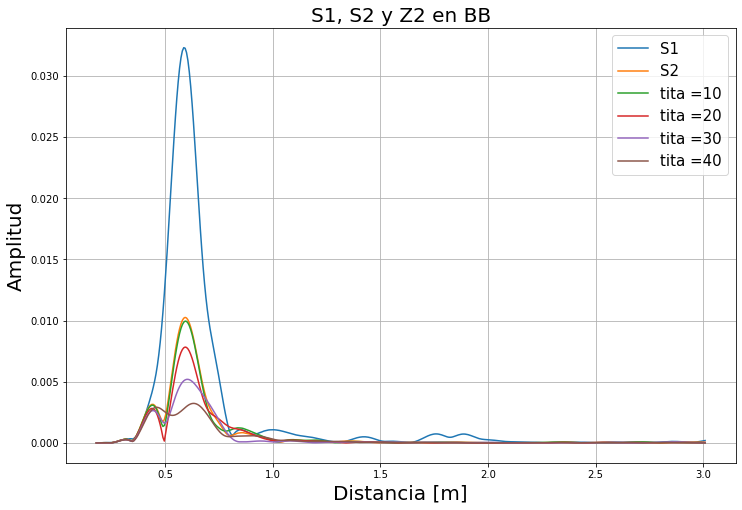

In [7]:
plt.figure(figsize=(12,8))
S1_BB = np.zeros_like(S1_avg,dtype=complex)
S1_BB = to_baseband(S1_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S1_BB),label='S1')

S2_BB = np.zeros_like(S2_avg,dtype=complex)
S2_BB = to_baseband(S2_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S2_BB),label='S2')

Z2_BB = np.zeros_like(Z2_avg,dtype=complex)
print(np.shape(Z2_BB))

for j in range(len(tita)):
    Z2_BB[:,j] = to_baseband(Z2_avg[:,j],Ts,BW,fc)
    plt.plot(dist,np.abs(Z2_BB[:,j]),label='tita ='+str(tita[j]))

plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('Distancia [m]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1, S2 y Z2 en BB',fontsize=20)

Text(0.5, 1.0, 'amplitudes maximas para |S1|, |S2| y |Z2| en func. de tita')

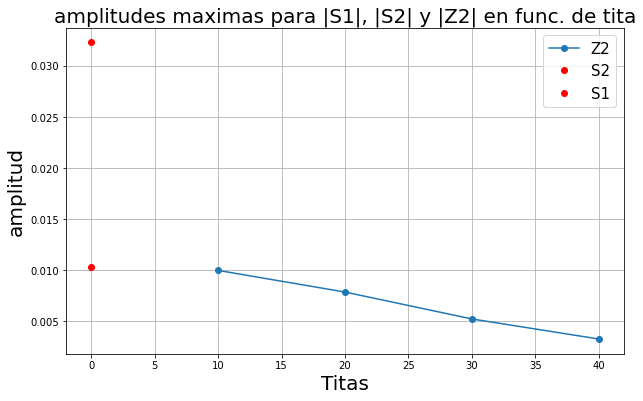

In [8]:
S1_max = np.max(np.abs(S1_BB))
S2_max = np.max(np.abs(S2_BB))
Z2_max = np.max(np.abs(Z2_BB), axis=0)

#obs: grafico lineal
plt.figure(figsize=(10,6))
plt.plot(tita,Z2_max,'-o',label='Z2')
plt.plot(0, S2_max, 'or', label='S2')
plt.plot(0, S1_max, 'or', label='S1')
plt.grid('on')
plt.legend(loc="best", fontsize=15)
plt.xlabel('Titas',fontsize=20)
plt.ylabel('amplitud',fontsize=20)
plt.title('amplitudes maximas para |S1|, |S2| y |Z2| en func. de tita',fontsize=20)
